In [1]:
from pathlib import Path
import math
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [2]:
sdfs = glob.glob('/home/willem/data/library_enumeration/LC_DNA-encoded_DEL_Reagents_and_Building_Blocks.sdf')

In [3]:
frame = PandasTools.LoadSDF(sdfs[0],smilesName='SMILES',molColName='Molecule',
           includeFingerprints=True)

In [4]:
frame["molecular_weight"] = frame["Molecule"].apply(Descriptors.ExactMolWt)
frame["n_hba"] = frame["Molecule"].apply(Descriptors.NumHAcceptors)
frame["n_hbd"] = frame["Molecule"].apply(Descriptors.NumHDonors)
frame["logp"] = frame["Molecule"].apply(Descriptors.MolLogP)

In [5]:
PandasTools.RenderImagesInAllDataFrames(images=True)

# Apparaentely the Molecule object needs to come first otherwise we do not get an image.
first_column = frame.pop('Molecule')
frame.insert(0, 'Molecule', first_column)

,Molecule,Mol Weight,Formula,IDNUMBER,Chemical_Name,CAS,clogP,MW,Acceptor,Donor,...,PriceCoeff,Description,FSP3,HAC,Collection,LCTNUMBER,molecular_weight,n_hba,n_hbd,logp
0,,177.08,C6H2F3NO2,F0001-0004,"1,2,4-Trifluoro-5-nitrobenzene",2105-61-5,2.34,177.08,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,177.003763,2,0,2.0121
1,,200.28,C10H20N2O2,F0001-0005,tert-butyl 4-aminopiperidine-1-carboxylate,87120-72-7,0.30,200.28,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,200.152478,3,1,1.3446
2,,157.55,C6H4ClNO2,F0001-0006,1-chloro-4-nitrobenzene,100-00-5,2.52,157.55,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,156.993056,2,0,2.2482
3,,153.14,C6H7N3O2,F0001-0009,(4-nitrophenyl)hydrazine,100-16-3,1.30,153.14,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,153.053826,4,2,0.8804
4,,165.15,C8H7NO3,F0001-0011,1-(4-nitrophenyl)ethan-1-one,100-19-6,1.47,165.15,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,165.042593,3,0,1.7974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70426,,259.26,C10H17N3O5,F9995-4305,2-(4-(3-aminopropyl)-1H-pyrazol-1-yl)ethan-1-o...,2303565-97-9,-1.00,169.22,2,2,...,1.00,solid,0.62,12.00,General,NaN,259.116821,6,4,-1.0777
70427,,280.37,C18H20N2O,F9995-4313,"3-benzyl-1,2,3,4,5,6-hexahydro-8H-1,5-methanop...",109667-42-7,2.26,280.36,1,1,...,1.50,solid,0.39,21.00,Advanced,NaN,280.157563,3,0,2.4676
70428,,234.17,C10H6N2O5,F9995-4327,4-hydroxy-8-nitroquinoline-3-carboxylic acid,35973-25-2,2.99,234.17,6,2,...,1.00,solid,0.00,17.00,General,NaN,234.027671,5,2,1.5468
70429,,225.87,C3H2Br2N2,F9995-4361,"2,4-dibromo-1H-imidazole",64591-03-3,1.89,225.87,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,223.858472,1,1,1.9347

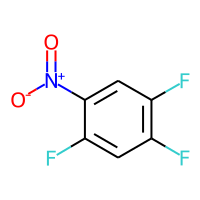
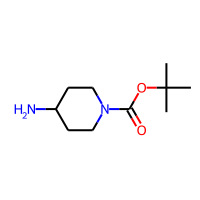
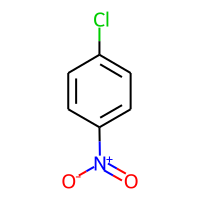
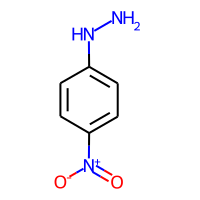
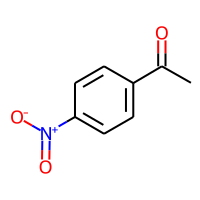
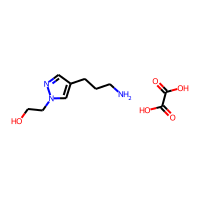
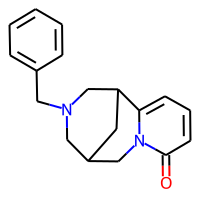
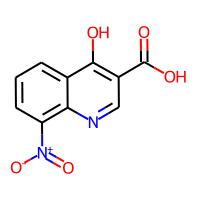
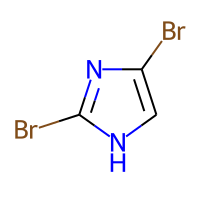
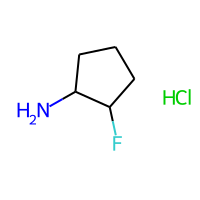

In [6]:
frame